<a href="https://colab.research.google.com/github/chotu259/Bhargavi/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This time we will be implementing an RNN model.

Time series forcasting is an important topic in Machine Learning.\
In this, we will are given the data for sunspots from jan 1749 to dec 1983.\
we will be dividing this data in to two parts, one for training our model and second for testing our model.\
In time series forcasting, we will have to take continuous data and not randomized data, because we have to predict on the basis of given past data.

In [89]:
import pandas as pd
import numpy as np
import tensorflow

We will have to take the data from the url given.

You have to implement the get_train_test function and return train_data and test_data, scaled in the range [0,1]
To scale the data, read on MinMaxScalar class in sklearn.preprocessing

Testing data should be the first 80 percent values and rest should be testing data. Also, convert the index of the data to datetime

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
def get_train_test(url):
  df=pd.read_csv(url)
  df['Month']=pd.to_datetime(df['Month'])
  df.set_index('Month', inplace=True)
  sunspots=df[['Sunspots']]
  scaler=MinMaxScaler(feature_range=(0,1))
  '''MinMaxScaler takes min and max of column uses this formula for scaling the data x-xmin/xmax-xmin maps to range(0,1)
  MinMaxScaler.fit_transform() method expects a 2D array as input'''
  scaled_sunspots=scaler.fit_transform(sunspots)
  df[['Sunspots']] =scaled_sunspots
  split_size=int(len(df)*0.8)
  train_data=df.iloc[:split_size]
  test_data=df.iloc[split_size:]

  return train_data,test_data


Now we will take the data from your implemented function :)

In [94]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
c=pd.read_csv(sunspots_url)
print(c)
train_data, test_data = get_train_test(sunspots_url)
X_train = train_data[:-1]
y_train = train_data[1:]

X_test = test_data[:-1]
y_test = test_data[1:]
print("train_data",X_train,y_train,"\ntest_data\n",X_test,y_test)

        Month  Sunspots
0     1749-01      58.0
1     1749-02      62.6
2     1749-03      70.0
3     1749-04      55.7
4     1749-05      85.0
...       ...       ...
2815  1983-08      71.8
2816  1983-09      50.3
2817  1983-10      55.8
2818  1983-11      33.3
2819  1983-12      33.4

[2820 rows x 2 columns]
train_data             Sunspots
Month               
1749-01-01  0.228526
1749-02-01  0.246651
1749-03-01  0.275808
1749-04-01  0.219464
1749-05-01  0.334909
...              ...
1936-07-01  0.206068
1936-08-01  0.342790
1936-09-01  0.299448
1936-10-01  0.350670
1936-11-01  0.454689

[2255 rows x 1 columns]             Sunspots
Month               
1749-02-01  0.246651
1749-03-01  0.275808
1749-04-01  0.219464
1749-05-01  0.334909
1749-06-01  0.328999
...              ...
1936-08-01  0.342790
1936-09-01  0.299448
1936-10-01  0.350670
1936-11-01  0.454689
1936-12-01  0.486210

[2255 rows x 1 columns] 
test_data
             Sunspots
Month               
1937-01-01  0.522065
1937-

Now let's make the model for our computations.

The model will consist of a layer of RNN of 64 nodes followed by a layer of Feed Forward Neural Network of one output node.

For compiling the node, we will use mean squared error as loss and mean absolute error as metric. We will not use accuracy as the metric. Think on why :)

In [92]:
# make the model .... all the best
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
# train the model on the X_train dataset
model=Sequential()
model.add(SimpleRNN(units=64,input_shape=(None ,1)) )
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train,y_train,epochs=100,batch_size=2,verbose=1)
# predict the values for training and testing data train_predict=model.predict(X_train)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1128/1128 [==============================] - 5s 3ms/step - loss: 0.0152 - mean_absolute_error: 0.0916
Epoch 2/100
1128/1128 [==============================] - 4s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0558
Epoch 3/100
1128/1128 [==============================] - 3s 3ms/step - loss: 0.0053 - mean_absolute_error: 0.0556
Epoch 4/100
1128/1128 [==============================] - 3s 3ms/step - los

Now let's print out what you have done :)

Train RMSE: 0.066 RMSE
Test RMSE: 0.092 RMSE


Text(0.5, 1.0, 'Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

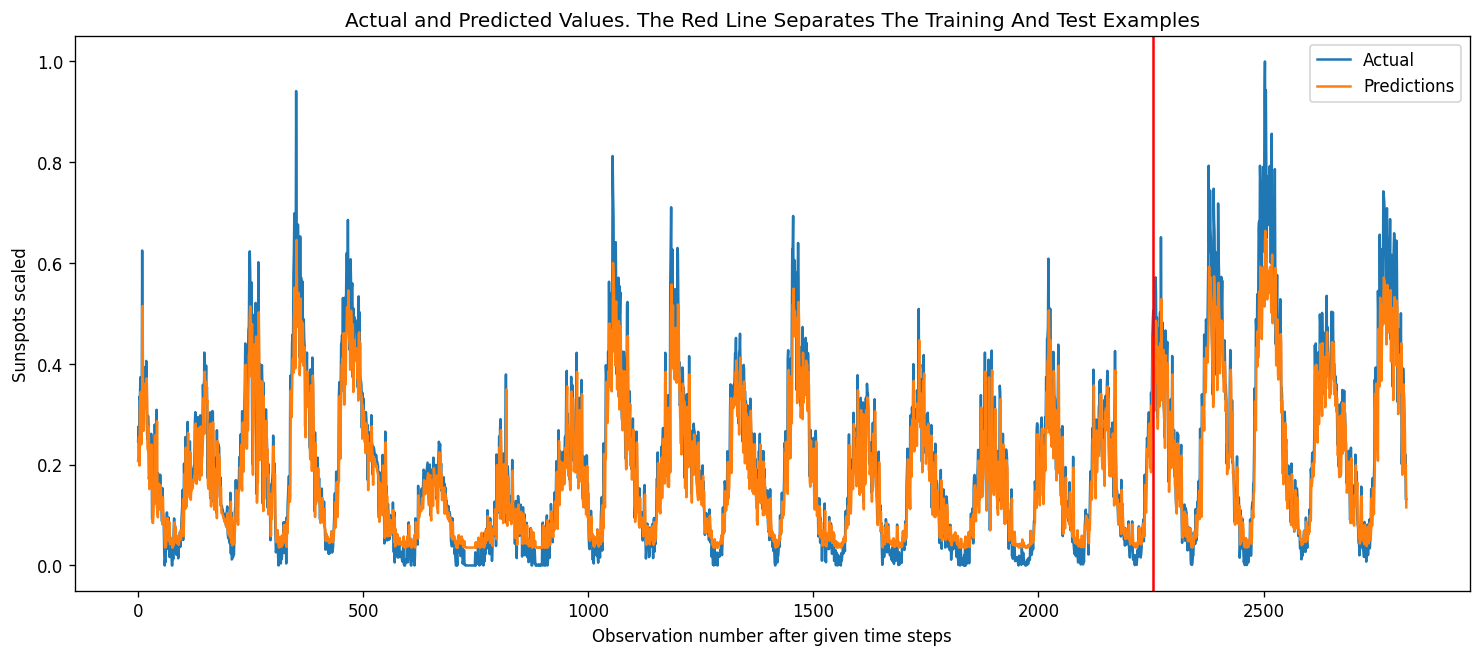

In [93]:
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))

actual = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)
rows = len(actual)
plt.figure(figsize=(15, 6), dpi=120)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(y_train), color='r')
plt.legend(['Actual', 'Predictions'])
plt.xlabel('Observation number after given time steps')
plt.ylabel('Sunspots scaled')
plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')